In [134]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
!pip install matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
!pip install sklearn
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library

print('Libraries imported.')

**Taking first table from Wikipedia page and converting it to a dataframe**

In [135]:
import pandas as pd
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df_list = pd.read_html(url)
torontoneigh=df_list[0]

**Deleting all rows with Not assigned value in Borough Column**

In [136]:
df = torontoneigh[torontoneigh.Borough != 'Not assigned']

**Merging rows with same Postal code**

In [137]:
df = df.groupby(['Postal Code','Borough'])['Neighbourhood'].apply(', '.join).reset_index()

**Replacing Not assigned Neighbourhoods with Borough name**

In [138]:
df.replace('Not assigned', df.Borough)
df.head(15)

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [139]:
df.shape

(103, 3)

**Adding lattitude and Longitude to the dataframe from the coordinates csv file**

In [140]:
latlon_df = pd.read_csv(r'C:\Users\praneetha.boppa\Downloads\Geospatial_Coordinates.csv')
latlon_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [141]:
final_df = pd.merge(left=df, right=latlon_df)
final_df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


**Importing required libraries for visulisation and clustering**

In [142]:
print('There are {} uniques Boroughs.'.format(len(final_df['Borough'].unique())))

There are 10 uniques Boroughs.


**There are 10 unique Boroughs and we will cluster neighbourhoods by these borough's - we will have 10 clusters in total. Gettin unique list of Borough's**

In [143]:
test = final_df['Borough'].unique()
test

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       'Mississauga', 'Etobicoke'], dtype=object)

**Getting a smaller data frame of neighbourhoods with Toronto as word in it for downtown toronto dataframe**

In [144]:
downtown_data = final_df[final_df['Borough'].str.contains('Toronto')].reset_index(drop=True)
downtown_data.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


**Getting a smaller dataframe with rest of the Borough's for GTA**

In [170]:
df_remaining=pd.merge(final_df,downtown_data,on=['Neighbourhood'],how="outer",indicator=True)
df_remaining=df_remaining.drop(['Postal Code_y','Borough_y','Latitude_y','Longitude_y'], axis =1)
df_remaining= df_remaining.rename(columns={'Postal Code_x': 'Postal Code','Borough_x': 'Borough','Latitude_x': 'Latitude','Longitude_x': 'Longitude'})
df_GTA=df[df_remaining['_merge']=='left_only']
#df_remaining.head()
print(df_GTA['Borough'].unique())
df_GTA.head()
pd.merge(left=df_GTA, right=latlon_df)


['Scarborough' 'North York' 'East York' 'York' 'Mississauga' 'Etobicoke']


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
59,M9N,York,Weston,43.706876,-79.518188
60,M9P,Etobicoke,Westmount,43.696319,-79.532242
61,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
62,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


**Adding Forsquare Credentials, and Url to retreive venues near a location**

In [145]:
CLIENT_ID = 'PWEZ5PLJANH1XER3OCXEQA2W50YB2LEVF1EJ0JKB15QUXNFG' # your Foursquare ID
CLIENT_SECRET = 'ZF0GTGLVHX2LY401OCNBBQ05FEHIT2TZE0VWKWEX4FAZKUIE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


In [146]:
radius = 500
LIMIT = 30
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)


**Defining functions to get near by venues**

In [147]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'NLatitude', 
                  'NLongitude', 
                  'Venue', 
                  'VLatitude', 
                  'VLongitude', 
                  'VCategory']
    
    return(nearby_venues)

**Using the function defined above to get venues for neighbourhoods in downtown toronto**

In [149]:
toronto_venues = getNearbyVenues(names=downtown_data['Neighbourhood'],
                                   latitudes=downtown_data['Latitude'],
                                   longitudes=downtown_data['Longitude']
                                  )


The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High 

In [150]:
print(toronto_venues.shape)
toronto_venues.head()

(861, 7)


,Neighbourhood,NLatitude,NLongitude,Venue,VLatitude,VLongitude,VCategory
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,The Beaches,43.676357,-79.293031,Dip 'n Sip,43.678897,-79.297745,Coffee Shop


**From dataframe containing venues for all neighbourhoods in downtown toronto, we get list unique venue categories so as to pick categories that are of interest for Government**

In [151]:
print(toronto_venues['VCategory'].unique())

['Trail' 'Health Food Store' 'Pub' 'Neighborhood' 'Coffee Shop'
 'Cosmetics Shop' 'Ice Cream Shop' 'Greek Restaurant' 'Italian Restaurant'
 'Brewery' 'Juice Bar' 'Yoga Studio' 'Fruit & Vegetable Store'
 'Dessert Shop' 'Pizza Place' 'Restaurant' 'Bookstore' 'Grocery Store'
 'Furniture / Home Store' 'Spa' 'Bubble Tea Shop' 'Caribbean Restaurant'
 'Gym' 'Fish & Chips Shop' 'Fast Food Restaurant' 'Sushi Restaurant'
 'Park' 'Liquor Store' 'Burrito Place' 'Pet Store' 'Steakhouse'
 'Movie Theater' 'Sandwich Place' 'Food & Drink Shop' 'Fish Market'
 'Seafood Restaurant' 'Gay Bar' 'Cheese Shop' 'Bakery'
 'American Restaurant' 'Café' 'Middle Eastern Restaurant'
 'Comfort Food Restaurant' 'Stationery Store' 'Thai Restaurant'
 'Coworking Space' 'Wine Bar' 'Latin American Restaurant' 'Jewelry Store'
 'Dim Sum Restaurant' 'Swim School' 'Bus Line' 'Breakfast Spot'
 'Department Store' 'Hotel' 'Gym / Fitness Center' 'Dance Studio'
 'Chinese Restaurant' 'Diner' 'Salon / Barbershop' 'Clothing Store'
 'Me

**Getting a draframe containing venues of only public interest from downtown Toronto**

In [225]:
categories = ['Light Rail Station', 'Train Station', 'History Museum','Baseball Field','College Arts Building', 'Airport','Airport Terminal','Airport Gate','Bus Station','Medical Center','Metro Station', 'Athletics & Sports','Playground','Skate Park','Bus Line','Soccer Field','Skating Rink','Basketball Stadium','Music Venue','Performing Arts Venue', 'Monument / Landmark', 'Park', 'Dog Run', 'Hockey Arena','Historic Site','Fountain','Museum','Art Museum','Garden']
Public_Toronto = toronto_venues[toronto_venues.VCategory.isin(categories)]
Public_Toronto.head()


,Neighbourhood,NLatitude,NLongitude,Venue,VLatitude,VLongitude,VCategory
41,"India Bazaar, The Beaches West",43.668999,-79.315572,Woodbine Park,43.664860,-79.315109,Park
76,Studio District,43.659526,-79.340923,Jimmie Simpson Park,43.659230,-79.345063,Park
83,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
87,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
88,Davisville North,43.712751,-79.390197,Sherwood Park,43.716551,-79.387776,Park


In [196]:
lattitude = 43.6777
longitude = 79.6248
venues_map = folium.Map(location=[latitude, longitude], zoom_start=10) # generate map centred around Toronto

# add popular spots to the map as blue circle markers
for lat, lng, label in zip(Public_Toronto.VLatitude, Public_Toronto.VLongitude, Public_Toronto.VCategory):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

In [153]:
toronto_onehot = pd.get_dummies(Public_Toronto[['VCategory']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = Public_Toronto['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_onehot.head()

,Neighbourhood,Airport,Airport Gate,Airport Terminal,Art Museum,Athletics & Sports,Basketball Stadium,Bus Line,College Arts Building,Dog Run,...,Light Rail Station,Monument / Landmark,Museum,Music Venue,Park,Performing Arts Venue,Playground,Skate Park,Skating Rink,Train Station
41,"India Bazaar, The Beaches West",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
76,Studio District,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
87,Lawrence Park,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
88,Davisville North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


**Adding Borough for each Neighbourhood in the onehot dataframe so as to count number of venues per Borough**

In [154]:
toronto_total=pd.merge(df, toronto_onehot)
#print(toronto_total['Borough'].unique())
toronto_total.head()

,Postal Code,Borough,Neighbourhood,Airport,Airport Gate,Airport Terminal,Art Museum,Athletics & Sports,Basketball Stadium,Bus Line,...,Light Rail Station,Monument / Landmark,Museum,Music Venue,Park,Performing Arts Venue,Playground,Skate Park,Skating Rink,Train Station
0,M4L,East Toronto,"India Bazaar, The Beaches West",0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,M4M,East Toronto,Studio District,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,M4N,Central Toronto,Lawrence Park,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,M4N,Central Toronto,Lawrence Park,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,M4P,Central Toronto,Davisville North,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


**Grouping rows in dataframe by Borough to get total count of public venues per Borough and adding Total row at the end**

In [172]:
toronto_Borough_grouped = toronto_total.groupby('Borough').sum().reset_index()
toronto_Borough_grouped = toronto_Borough_grouped.append(toronto_Borough_grouped.sum(numeric_only=True), ignore_index=True)
toronto_Borough_grouped = toronto_Borough_grouped.replace(np.NaN, 'Total')
toronto_Borough_grouped

,Borough,Airport,Airport Gate,Airport Terminal,Art Museum,Athletics & Sports,Basketball Stadium,Bus Line,College Arts Building,Dog Run,...,Light Rail Station,Monument / Landmark,Museum,Music Venue,Park,Performing Arts Venue,Playground,Skate Park,Skating Rink,Train Station
0,Central Toronto,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
1,Downtown Toronto,1.0,1.0,2.0,1.0,1.0,2.0,0.0,1.0,0.0,...,0.0,1.0,4.0,1.0,16.0,2.0,2.0,0.0,1.0,1.0
2,East Toronto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0
3,West Toronto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0
4,Total,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,2.0,1.0,4.0,3.0,28.0,3.0,2.0,1.0,1.0,1.0


**Grouping rows in dataframe by Neighbourhood to get total count of public venues per Neighbourhood**

In [156]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').sum().reset_index()
toronto_grouped

,Neighbourhood,Airport,Airport Gate,Airport Terminal,Art Museum,Athletics & Sports,Basketball Stadium,Bus Line,College Arts Building,Dog Run,...,Light Rail Station,Monument / Landmark,Museum,Music Venue,Park,Performing Arts Venue,Playground,Skate Park,Skating Rink,Train Station
0,Berczy Park,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,"Brockton, Parkdale Village, Exhibition Place",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,"Business reply mail Processing Centre, South C...",0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,"CN Tower, King and Spadina, Railway Lands, Har...",1,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Central Bay Street,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,Christie,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
6,Church and Wellesley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,"Commerce Court, Victoria Hotel",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,Davisville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,Davisville North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


**Getting Venues for all neighbourhoods in GTA using aobve defined function**

In [158]:
print(GTA_venues.shape)
GTA_venues.head()

(844, 7)


,Neighbourhood,NLatitude,NLongitude,Venue,VLatitude,VLongitude,VCategory
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Sail Sushi,43.765951,-79.191275,Restaurant


**From dataframe containing venues for all neighbourhoods in GTA, we get list unique venue categories so as to pick categories that are of interest for Government**

In [159]:
print(GTA_venues['VCategory'].unique())

['Fast Food Restaurant' 'Bar' 'Bank' 'Electronics Store' 'Restaurant'
 'Mexican Restaurant' 'Rental Car Location' 'Medical Center'
 'Intersection' 'Breakfast Spot' 'Coffee Shop' 'Korean Restaurant'
 'Caribbean Restaurant' 'Hakka Restaurant' 'Thai Restaurant'
 'Athletics & Sports' 'Bakery' 'Gas Station' 'Fried Chicken Joint'
 'Playground' 'Department Store' 'Discount Store' 'Chinese Restaurant'
 'Hobby Shop' 'Ice Cream Shop' 'Bus Line' 'Metro Station' 'Bus Station'
 'Soccer Field' 'Motel' 'American Restaurant' 'Café'
 'General Entertainment' 'Skating Rink' 'College Stadium'
 'Indian Restaurant' 'Pet Store' 'Vietnamese Restaurant' 'Sandwich Place'
 'Middle Eastern Restaurant' 'Auto Garage' 'Lounge'
 'Latin American Restaurant' 'Italian Restaurant' 'Noodle House'
 'Pizza Place' 'Pharmacy' 'Park' 'Grocery Store' 'Gym' 'Burger Joint'
 'Gym Pool' 'Nail Salon' 'Golf Course' 'Pool' 'Mediterranean Restaurant'
 'Dog Run' 'Toy / Game Store' 'Movie Theater' 'Shopping Mall'
 'Clothing Store' 'Choco

**Getting a draframe containing venues of only public interest from GTA**

In [160]:
#categories_1 = ['Light Rail Station', 'Train Station', 'History Museum','Baseball Field', 'Bus Station','Medical Center','Metro Station', 'Athletics & Sports','Playground','Bus Line','Soccer Field','Skating Rink','Basketball Stadium','Music Venue','Performing Arts Venue', 'Monument / Landmark', 'Park', 'Dog Run', 'Hockey Arena','Historic Site','Fountain','Museum','Art Museum','Garden']
Public_GTA = GTA_venues[GTA_venues.VCategory.isin(categories)]
Public_GTA.head()

,Neighbourhood,NLatitude,NLongitude,Venue,VLatitude,VLongitude,VCategory
7,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Woburn Medical Centre,43.766631,-79.192286,Medical Center
16,Cedarbrae,43.773136,-79.239476,Centennial Recreation Centre,43.774593,-79.236500,Athletics & Sports
21,Scarborough Village,43.744734,-79.239476,McCowan Park,43.745089,-79.239336,Playground
29,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,TTC Bus #68 Warden,43.711778,-79.279714,Bus Line
30,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,Warden Subway Station,43.711229,-79.279602,Metro Station


In [185]:
lattitude = 43.6777
longitude = 79.6248
venues_map = folium.Map(location=[latitude, longitude], zoom_start=10) # generate map centred around Toronto

# add popular spots to the map as blue circle markers
for lat, lng, label in zip(Public_GTA.VLatitude, Public_GTA.VLongitude, Public_GTA.VCategory):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

In [221]:
Columns= list(toronto_Borough_grouped.columns)
Columns = Columns[1:len(Columns)]
len(Columns)

23

In [222]:
Toronto_total = (toronto_Borough_grouped.loc[toronto_Borough_grouped['Borough'] == 'Total']).values.tolist()
Toronto_total = Toronto_total[0]
Toronto_total = Toronto_total[1:len(Toronto_total)]
len(Toronto_total)

23

In [162]:
GTA_onehot = pd.get_dummies(Public_GTA[['VCategory']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
GTA_onehot['Neighbourhood'] = Public_GTA['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [GTA_onehot.columns[-1]] + list(GTA_onehot.columns[:-1])
GTA_onehot = GTA_onehot[fixed_columns]
GTA_onehot.head()

,Neighbourhood,Airport,Art Museum,Athletics & Sports,Baseball Field,Basketball Stadium,Bus Line,Bus Station,Dog Run,Fountain,...,Metro Station,Monument / Landmark,Museum,Music Venue,Park,Performing Arts Venue,Playground,Skating Rink,Soccer Field,Train Station
7,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,Cedarbrae,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,Scarborough Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29,"Golden Mile, Clairlea, Oakridge",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,"Golden Mile, Clairlea, Oakridge",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**Adding Borough for each Neighbourhood in the onehot dataframe so as to count number of venues per Borough**

In [163]:
GTA_total=pd.merge(df,GTA_onehot)
print(GTA_total['Borough'].unique())
GTA_total.head()

['Scarborough' 'North York' 'East York' 'York' 'Mississauga' 'Etobicoke']


,Postal Code,Borough,Neighbourhood,Airport,Art Museum,Athletics & Sports,Baseball Field,Basketball Stadium,Bus Line,Bus Station,...,Metro Station,Monument / Landmark,Museum,Music Venue,Park,Performing Arts Venue,Playground,Skating Rink,Soccer Field,Train Station
0,M1E,Scarborough,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M1H,Scarborough,Cedarbrae,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M1J,Scarborough,Scarborough Village,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**Grouping rows in dataframe by Borough to get total count of public venues per Borough and adding Total row at the end**

In [164]:
GTA_grouped_Borough = GTA_total.groupby('Borough').sum().reset_index()
GTA_grouped_Borough = GTA_grouped_Borough.append(GTA_grouped_Borough.sum(numeric_only=True), ignore_index=True)
GTA_grouped_Borough = GTA_grouped_Borough.replace(np.NaN, 'Total')
GTA_grouped_Borough

,Borough,Airport,Art Museum,Athletics & Sports,Baseball Field,Basketball Stadium,Bus Line,Bus Station,Dog Run,Fountain,...,Metro Station,Monument / Landmark,Museum,Music Venue,Park,Performing Arts Venue,Playground,Skating Rink,Soccer Field,Train Station
0,East York,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
1,Etobicoke,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3.0,1.0,9.0,1.0,2.0,0.0,0.0,1.0
2,Mississauga,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,North York,4.0,1.0,7.0,6.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0
4,Scarborough,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0
5,York,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,1.0,0.0,1.0,0.0,0.0
6,Total,4.0,1.0,10.0,6.0,2.0,3.0,1.0,1.0,1.0,...,1.0,1.0,3.0,1.0,37.0,2.0,5.0,4.0,1.0,1.0


In [226]:
toronto_Borough_grouped.columns

Index(['Borough', 'Airport', 'Airport Gate', 'Airport Terminal', 'Art Museum',
       'Athletics & Sports', 'Basketball Stadium', 'Bus Line',
       'College Arts Building', 'Dog Run', 'Fountain', 'Garden',
       'Historic Site', 'History Museum', 'Light Rail Station',
       'Monument / Landmark', 'Museum', 'Music Venue', 'Park',
       'Performing Arts Venue', 'Playground', 'Skate Park', 'Skating Rink',
       'Train Station'],
      dtype='object')

In [228]:
GTA_grouped_Borough.columns

Index(['Borough', 'Airport', 'Art Museum', 'Athletics & Sports',
       'Baseball Field', 'Basketball Stadium', 'Bus Line', 'Bus Station',
       'Dog Run', 'Fountain', 'Garden', 'Historic Site', 'Hockey Arena',
       'Light Rail Station', 'Medical Center', 'Metro Station',
       'Monument / Landmark', 'Museum', 'Music Venue', 'Park',
       'Performing Arts Venue', 'Playground', 'Skating Rink', 'Soccer Field',
       'Train Station'],
      dtype='object')

In [223]:
GTA_total = (GTA_grouped_Borough.loc[GTA_grouped_Borough['Borough'] == 'Total']).values.tolist()
GTA_total = GTA_total[0]
GTA_total = GTA_total[1:len(GTA_total)]
len(GTA_total)

24

**Grouping rows in dataframe by Neighbourhood**

In [165]:
GTA_grouped = GTA_total.groupby('Neighbourhood').sum().reset_index()
GTA_grouped

,Neighbourhood,Airport,Art Museum,Athletics & Sports,Baseball Field,Basketball Stadium,Bus Line,Bus Station,Dog Run,Fountain,...,Metro Station,Monument / Landmark,Museum,Music Venue,Park,Performing Arts Venue,Playground,Skating Rink,Soccer Field,Train Station
0,Agincourt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,"Alderwood, Long Branch",0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
2,"Bathurst Manor, Wilson Heights, Downsview North",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,"Bedford Park, Lawrence Manor East",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,"Birch Cliff, Cliffside West",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,Caledonia-Fairbanks,0,0,0,0,0,1,0,0,0,...,0,0,0,0,2,0,0,0,0,0
6,Canada Post Gateway Processing Centre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7,Cedarbrae,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,Don Mills,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Comparing total number of venues per each caetegory for Toronto and GTA in bar Graph**

<AxesSubplot:>

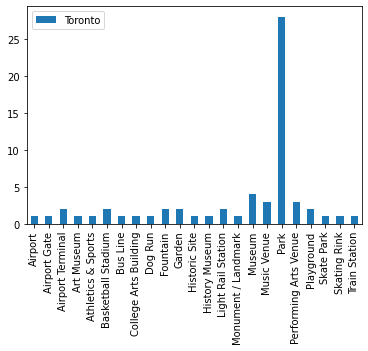

In [245]:
p = toronto_Borough_grouped.columns
T_index = p
T_index = T_index[1:len(T_index)]
T_index = list(T_index)
plotdata = pd.DataFrame(    {"Toronto": Toronto_total}, index = T_index)
plotdata.plot(kind="bar")

<AxesSubplot:>

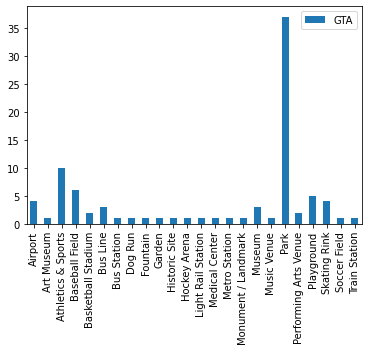

In [253]:
q = GTA_grouped_Borough.columns
GTA_index = q
GTA_index = GTA_index[1:len(GTA_index)]
GTA_index = list(GTA_index)

plotdata = pd.DataFrame(    {"GTA": GTA_total}, index = GTA_index)
plotdata.plot(kind="bar")

**Having 4 airports for Toronto downtown, that too in all North York kind of sounds suspicious, lets investigate further**

In [171]:
GTA=pd.merge(df,Public_GTA)
X= GTA[GTA['Borough']=='North York']
Y=X[X['VCategory']=='Airport']
Y.head()

,Postal Code,Borough,Neighbourhood,NLatitude,NLongitude,Venue,VLatitude,VLongitude,VCategory
23,M3K,North York,Downsview,43.737473,-79.464763,Toronto Downsview Airport (YZD),43.738883,-79.470111,Airport
28,M3L,North York,Downsview,43.737473,-79.464763,Toronto Downsview Airport (YZD),43.738883,-79.470111,Airport
33,M3M,North York,Downsview,43.737473,-79.464763,Toronto Downsview Airport (YZD),43.738883,-79.470111,Airport
38,M3N,North York,Downsview,43.737473,-79.464763,Toronto Downsview Airport (YZD),43.738883,-79.470111,Airport


**Although there seems to be 4 airports in Northyork all of them are in Downsview neighbourhood. So there is only 1 airport.**

**Population density of GTA is 849 people per square kilometer. There are 37 parks, 5 play grounds,1 Soccer Feild, 2 Baseball feilds, 1 major Train station, 1 Bus station and 1 major publicly maintained fountain.**

**Population density of downtown Toronto is 8,210 people per square kilometer. There are 29 parks, 3 play grounds, 2 Basket Ball stadiums, 2 Skate parks, 3 Light Rail stations, 1 major Train station, 1 Bus station**

**We see that information about schools and hospitals is missing in the data provided by Four square. So lets pull that data for Hospitals from this Wikipedia page, https://en.wikipedia.org/wiki/List_of_hospitals_in_Toronto#:~:text=There%20are%20over%20forty%20hospitals,with%20the%20University%20of%20Toronto. and Schools from https://www.tdsb.on.ca/About-Us#:~:text=Quick%20Facts,approximately%20247%2C000%20students%20each%20year.&text=There%20are%20over%20120%20languages%20spoken%20by%20TDSB%20students%20and%20their%20families.**

In [166]:
url_hosp='https://en.wikipedia.org/wiki/List_of_hospitals_in_Toronto#:~:text=There%20are%20over%20forty%20hospitals,with%20the%20University%20of%20Toronto'
df_hosp = pd.read_html(url_hosp)
torontohosp=df_hosp[0]
print(torontohosp.shape)
torontohosp.head()

(35, 7)


,Name,Founded,District,Network,University affiliate,Former name(s),Image
0,Baycrest Health Sciences,1918,North York,NaN,University of Toronto(fully-affiliated),Toronto Jewish Old Folks Home,NaN
1,Bellwood Health Services,1984,East York,Edgewood Health Network,NaN,NaN,NaN
2,Bridgepoint Active Healthcare,1875,Old Toronto,Sinai Health System,University of Toronto(community-affiliated),Riverdale Hospital,NaN
3,Casey House,1988,Old Toronto,NaN,NaN,NaN,NaN
4,"Centre for Addiction and Mental Health, Colleg...",1966,Old Toronto,Centre for Addiction and Mental Health,University of Toronto(fully-affiliated),Clarke Institute of Psychiatry,NaN


**There are total 35 Hospitals in Toronto downtown and GTA together**

In [167]:
downtown_hosp = torontohosp[torontohosp['District']=='Old Toronto']
print(downtown_hosp.shape)
downtown_hosp.head()

(16, 7)


,Name,Founded,District,Network,University affiliate,Former name(s),Image
2,Bridgepoint Active Healthcare,1875,Old Toronto,Sinai Health System,University of Toronto(community-affiliated),Riverdale Hospital,NaN
3,Casey House,1988,Old Toronto,NaN,NaN,NaN,NaN
4,"Centre for Addiction and Mental Health, Colleg...",1966,Old Toronto,Centre for Addiction and Mental Health,University of Toronto(fully-affiliated),Clarke Institute of Psychiatry,NaN
5,"Centre for Addiction and Mental Health, Queen ...",1850,Old Toronto,Centre for Addiction and Mental Health,University of Toronto(fully-affiliated),Provincial Lunatic Asylum;Queen Street Mental ...,NaN
6,"Centre for Addiction and Mental Health, Russel...",1949,Old Toronto,Centre for Addiction and Mental Health,University of Toronto(fully-affiliated),Addiction Research Foundation,NaN


**Of the 35 hospitals, 16 of them are in downtown Toronto. So 19 are in GTA. Based on population Density, this sounds reseaonable**

**We have the following information from TDSB(Toronto Dristrict School Board) on Number of Toronto Public schools. This includes schools in downtown and part of sub urbs, There seem to be no clear division of schools between downtown and GTA**

**583 schools in total 
473 Elementary Schools (including 1 Elementary/Secondary Indigenous Education School, 18 Elementary Alternative Schools, 6 Special Education Self-Contained Schools)
110 Secondary Schools (including 1 Elementary/Secondary Alternative School, 20 Secondary Alternative Schools, 4 Caring and Safe Schools Programs, 5 Adult/EdVance Programs, 2 Native Learning Centres, 6 Special Education Self-Contained Schools)**

**We are also missing lot of public transit information. To get this we will run four square trending API at peak times to get public transit information**

In [180]:
lattitude = 43.6777
longitude = 79.6248
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, lattitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
else:
    trending_venues = results['response']['venues']
    trending_venues_df = pd.json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

trending_venues_df

'No trending venues are available at the moment!'

**Unfortunately may be due to COVID, there arent any trending values even at 8 in the morning in downtown toronto**